In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy import sparse

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss,confusion_matrix,classification_report,roc_curve,auc




In [54]:
train = pd.read_csv('D://Project//NLP//dataset//train.csv',  usecols=['target', 'comment_text'], nrows=1000)

In [55]:
len(train)

1000

0.2 : Non-Toxic
0.4 : Mildly Toxic
0.6 : Toxic

In [56]:
targets = train['target'].apply(lambda t: 'non-toxic' if t <= 0.2 else 'mildly-toxic' if t <= 0.6 else 'toxic')
train.update(targets)



In [57]:
train.target.value_counts()

non-toxic       893
mildly-toxic     82
toxic            25
Name: target, dtype: int64

In [58]:
y = pd.get_dummies(train['target'])

del train['target']

In [59]:
X_train, X_test, y_train, y_test = train_test_split( train, y, test_size=0.33, random_state=0)

In [60]:
def text_prepare(text): ### The function will take in text and lower case it remove the stopwords, symbols and return it
    
    
#     STOPWORDS = set(stopwords.words('english'))

    text = text.lower()                          ### Write a code which can change the input text to lowercase
    text = re.compile('[/(){}\[\]\|@,;]').sub(' ', text)    ### Write a code which replaces REPLACE_BY_SPACE_RE symbols by space in text
    text = re.compile('[^0-9a-z #+_]').sub('', text)          ### Write a code which deletes symbols which are in BAD_SYMBOLS_RE from text
#     pattern = re.compile(r'\b(' + r'|'.join(STOPWORDS) + r')\b\s*') 
#     text = pattern.sub('', text)                 ### Write a code which deletes stopwords from text
    text = re.sub(' +', ' ', text)
        
    return text

In [61]:
COMMENT = 'comment_text'
X_train[COMMENT].fillna("unknown", inplace=True)
X_test[COMMENT].fillna("unknown", inplace=True)

In [62]:
X_train[COMMENT] = [text_prepare(COMMENT) for COMMENT in X_train[COMMENT]]
X_test[COMMENT] = [text_prepare(COMMENT) for COMMENT in X_test[COMMENT]]


C:\Users\manis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\manis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [63]:
vect_word = TfidfVectorizer(max_features=10000, lowercase=True, analyzer='word',stop_words= 'english',dtype=np.float32)

In [64]:
tr_vect = vect_word.fit_transform(X_train['comment_text'])
ts_vect = vect_word.transform(X_test['comment_text'])

In [65]:
X = sparse.hstack([tr_vect])
x_test = sparse.hstack([ts_vect])

In [66]:
target_col = ['non-toxic', 'mildly-toxic', 'toxic']

In [71]:
prd = np.zeros((x_test.shape[0],y.shape[1]))
cv_score =[]
for i,col in enumerate(target_col):
    lr = LogisticRegression(C=4,random_state = i)
    print('Building {} model for column:{''}'.format(i,col)) 
    lr.fit(X,y_train[col])
    #cv_score.append(lr.score)
    prd[:,i] = lr.predict_proba(x_test)[:,1]

Building 0 model for column:non-toxic
Building 1 model for column:mildly-toxic
Building 2 model for column:toxic


C:\Users\manis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Column: toxic

Confusion matrix
 [[320   0]
 [ 10   0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       320
           1       0.00      0.00      0.00        10

   micro avg       0.97      0.97      0.97       330
   macro avg       0.48      0.50      0.49       330
weighted avg       0.94      0.97      0.95       330



C:\Users\manis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Text(0.5, 1.0, 'Reciever Operating Characteristic')

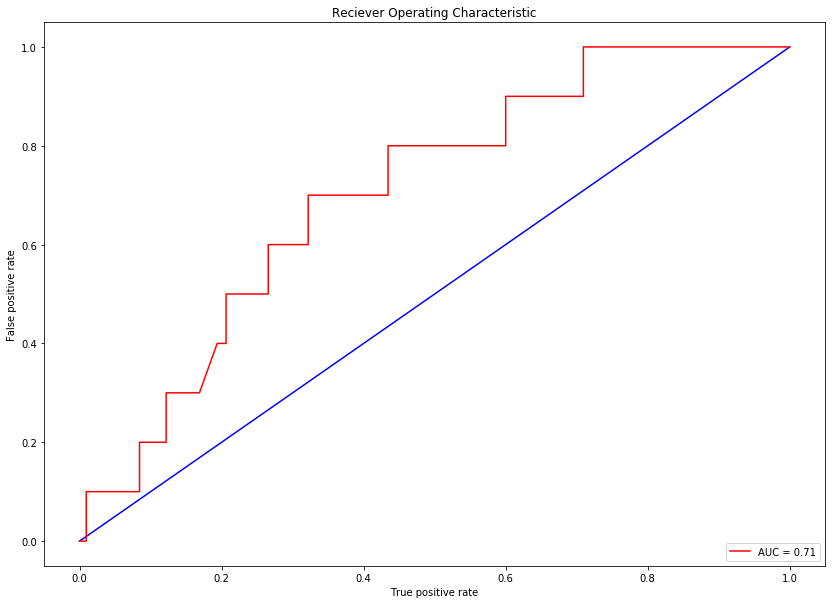

In [73]:
col = 'toxic'
print("Column:",col)
pred =  lr.predict(x_test)
print('\nConfusion matrix\n',confusion_matrix(y_test[col],pred))
print(classification_report(y_test[col],pred))
pred1 = lr.predict_proba(x_test)[:,1]
frp,trp,thres = roc_curve(y_test[col],pred1)
auc_val =auc(frp,trp)
plt.figure(figsize=(14,10))
plt.plot([0,1],[0,1],color='b')
plt.plot(frp,trp,color='r',label= 'AUC = %.2f'%auc_val)
plt.legend(loc='lower right')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('Reciever Operating Characteristic')

Column: non-toxic

Confusion matrix
 [[ 32   0]
 [298   0]]
              precision    recall  f1-score   support

           0       0.10      1.00      0.18        32
           1       0.00      0.00      0.00       298

   micro avg       0.10      0.10      0.10       330
   macro avg       0.05      0.50      0.09       330
weighted avg       0.01      0.10      0.02       330



Text(0.5, 1.0, 'Reciever Operating Characteristic')

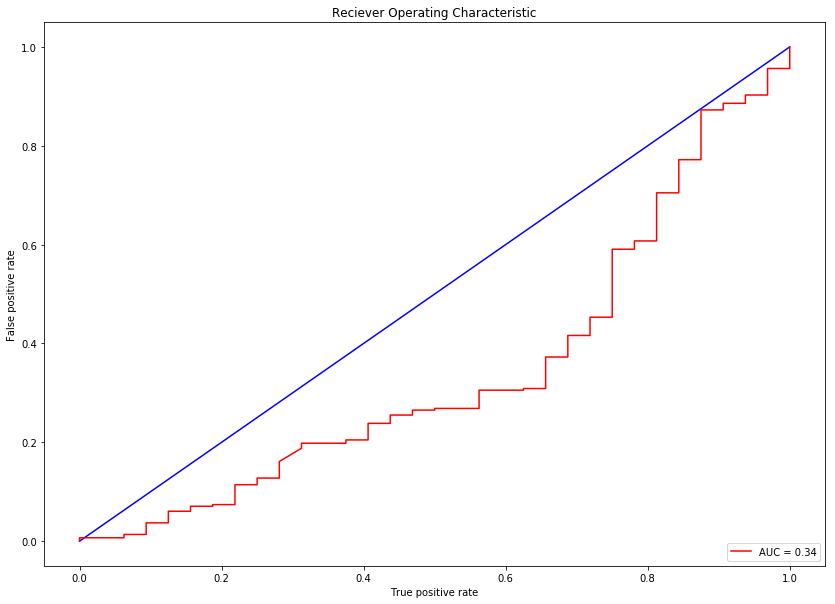

In [74]:
col = 'non-toxic'
print("Column:",col)
pred =  lr.predict(x_test)
print('\nConfusion matrix\n',confusion_matrix(y_test[col],pred))
print(classification_report(y_test[col],pred))
pred2 = lr.predict_proba(x_test)[:,1]
frp,trp,thres = roc_curve(y_test[col],pred2)
auc_val =auc(frp,trp)
plt.figure(figsize=(14,10))
plt.plot([0,1],[0,1],color='b')
plt.plot(frp,trp,color='r',label= 'AUC = %.2f'%auc_val)
plt.legend(loc='lower right')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('Reciever Operating Characteristic')

Column: mildly-toxic

Confusion matrix
 [[308   0]
 [ 22   0]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       308
           1       0.00      0.00      0.00        22

   micro avg       0.93      0.93      0.93       330
   macro avg       0.47      0.50      0.48       330
weighted avg       0.87      0.93      0.90       330



Text(0.5, 1.0, 'Reciever Operating Characteristic')

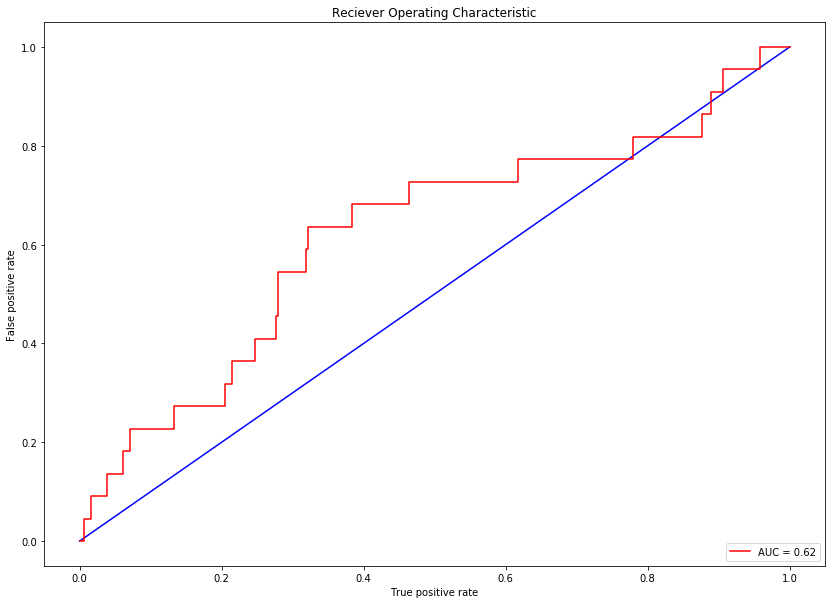

In [75]:
col = 'mildly-toxic'
print("Column:",col)
pred =  lr.predict(x_test)
print('\nConfusion matrix\n',confusion_matrix(y_test[col],pred))
print(classification_report(y_test[col],pred))
pred3 = lr.predict_proba(x_test)[:,1]
frp,trp,thres = roc_curve(y_test[col],pred3)
auc_val =auc(frp,trp)
plt.figure(figsize=(14,10))
plt.plot([0,1],[0,1],color='b')
plt.plot(frp,trp,color='r',label= 'AUC = %.2f'%auc_val)
plt.legend(loc='lower right')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('Reciever Operating Characteristic')

### Our classes are imbalanced and will favor the majority class. We will use sampling techniques to handle this.

In [ ]:
import nltk
from nltk.stem import  WordNetLemmatizer

In [ ]:
lemmatiser = WordNetLemmatizer()
